# Lesson 7.1 无监督学习算法与K-Means快速聚类

&emsp;&emsp;从本节开始，我们将介绍无监督学习领域内最重要的一类算法——聚类算法。

In [1]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

## 一、聚类算法与无监督学习

&emsp;&emsp;在此前的学习中，无论是回归问题还是分类问题，本质上其实都属于有监督学习范畴：即算法的学习是在标签的监督下进行有选择规律学习，也就是学习那些能够对标签分类或者数值预测起作用的规律。而无监督学习，则是在没有标签的数据集中进行规律挖掘，既然没有标签，自然也就没有了规律是否对预测结果有效一说，也就失去了对挖掘规律的“监督”过程，这也就是无监督算法的由来。

&emsp;&emsp;而如果一个数据集没有标签，我们就只能围绕特征矩阵进行规律挖掘，更具体的来说，面对没有标签的数据集，我们只能去尽可能的探索特征矩阵中的数值分布规律，当然这些规律肯定是需要符合一定的业务场景、拥有一定的现实意义。

&emsp;&emsp;而在所有的无监督学习算法中，最著名的两类算法就是聚类算法和关联规则算法。其中聚类算法是去探索特征矩阵中那些样本更加相似、更有可能是同一类（注意不是更加接近），并据此对数据集中的样本进行分类（当然有时我们也会针对数据集的列进聚类），著名的如RFM用户价值划分，就是通过三个维度的评估对不同类型用户进行价值划分的聚类过程。    

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gsc1hh339vj30to0jgagn.jpg" alt="1" style="zoom:30%;" />

&emsp;&emsp;而关联规则算法则更加聚焦于一个具体的业务场景——即针对一个购物篮数据进行频繁项的挖掘，并据此进一步探索不同数据之间是否存在一定的“关联性”，也就是所谓的关联规则，典型的如啤酒和尿布（尽管已经被证伪），就是在进行关联性的挖掘。当然，相比之下，聚类算法的使用场景会更多。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gsc1hjh87bj318e0940wc.jpg" alt="1" style="zoom:33%;" />

> 当然我们也可以换个角度来理解，那就是如果数据没有标签，那么我们就只能从数据内部结构入手，探索数据的分布规律、并对其进行类别的划分。

&emsp;&emsp;总的来说，我们可以将聚类算法的使用场景划分成两类，其一是独力解决一个无监督问题，如上对客户价值进行划分，或者，有时我们也会利用聚类算法来辅助有监督学习的过程，通常来说是辅助进行特征工程方面的工作，如进行样本的合并、进行特征的合并等。此外，在极少情况下，我们会利用聚类算法去解决有监督学习问题。

&emsp;&emsp;当然，围绕样本进行分群的聚类算法并不是一个算法，而是一类算法。所谓无监督学习最核心的算法类，当前流行的聚类算法也有数十种之多，而不同的聚类算法在进行分群的过程中实际效果也各不相同，在sklearn中就有一个著名的、不同聚类算法的效果比较图：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gsc1qnmt9aj31at0u04qq.jpg" alt="1" style="zoom:33%;" />

其中就列举了10种不同的聚类针对不同分布形态的数据最终的聚类效果。能够看出，尽管聚类是尝试对数据进行分群，但聚类算法（计算流程）不同，分群效果也是截然不同的。

&emsp;&emsp;不过尽管聚类算法看起来数量不少，但实际上对聚类算法的掌握难度其实要远远低于有监督学习算法，由于没有规律的选择环节，因此无监督学习算法并不存在类似模型泛化能力评估以及模型调参的过程；另外，在实际解决问题的过程中，机器学习类算法的主流应用还是在于预测，因此聚类算法的实际使用场景也要远少于有监督类算法。正是因为上述种种，本节将挑选最为常用三类聚类算法来进行集中的讨论，即K-Means快速聚类、小批量快速聚类（Mini Batch K-Means）以及BDSCAN基于密度的聚类，并据此深入探讨聚类算法的算法共性与使用共性。

## 二、K-Means快速聚类的算法原理

&emsp;&emsp;首先是K-Means快速聚类，这是一种能够对数据集进行指定类别数量分群的聚类算法，同时也是目前最常用的一类聚类算法。我们此前说到，聚类算法其实就是对数据进行分群，而不同聚类算法流程不同、对应的分群规则也有所不同，对聚类算法流程的掌握，实际上也就是对数据分群规则的掌握。而对于K-Means快速聚类来说，我们可以通过如下实例来介绍该算法的聚类流程。

### 1.K-Means快速聚类的基本执行流程

&emsp;&emsp;首先进行数据准备，我们借助此前定义的arrayGenCla函数创建一组数据，注意，无监督算法的执行流程不需要标签，也不会从标签中提取任何信息，因此其实我们核心是需要arrayGenCla函数所创建的特征矩阵。而为了更好的展示聚类算法对特征矩阵的分群功能，我们创建一组包含两个特征的数据，在二维特征空间内对其进行聚类：

In [288]:
np.random.seed(23)
X, y = arrayGenCla(num_examples = 20, num_inputs = 2, num_class = 2, deg_dispersion = [2, 0.5])

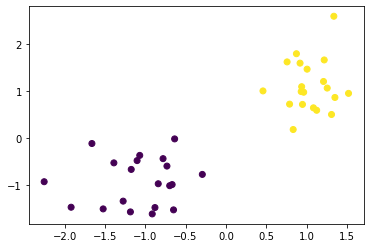

In [289]:
plt.scatter(X[:, 0],X[:, 1],c=y)

- 聚类的类别数量

&emsp;&emsp;接下来，围绕已经生成X，我们尝试对其进行聚类。对于K-Means来说，首先需要确定的是需要将分成几个群，尽管我们从样本的分布来看分成两个群更加合适，但实际上K-Means聚类的类别数量根本上由实际业务来决定，并且由于没有标签的引导，例如上述在围绕用户价值进行分群时，将用户分为高价值、低价值两类还是分成高、中、低价值三类，实际上是由业务端来决定。从算法原理层面来说，由于聚类算法缺少了标签的指引，所以分成几类其实也没有非常严谨的数值指标进行引导。此处我们假定需要对上述数据聚成两类，然后执行后续的操作。

> 此处有两个点需要进行拓展讨论：      
&emsp;&emsp;首先，尽管一般来说没有非常严谨的指标来指导K-Means应该聚成几类，但却有很多用于评估聚类结果的指标，有的时候，我们也可以从这些指标中反推应该聚成几类更加合适，如R语言中就有算法包能够对K-Means的聚类结果从几十个角度进行评估；      
&emsp;&emsp;其次，并非所有的聚类算法都需要在聚类开始前设置聚类的类别数量，如后续将要介绍的DBSCAN。

&emsp;&emsp;需要知道的是，聚成几类，实际上就是K-Means中的K。

- 创建初始中心点

&emsp;&emsp;在确定了聚类的类别数量（也就是两类）之后，接下来，我们需要在特征空间中随机生成两个点，作为初始中心点。

&emsp;&emsp;这里需要注意，在K-Measn快速聚类过程中，这类中心点其实起到了至关重要的作用，中心点会随着迭代逐步发生变化，而每个点应该属于哪一类，其实也都是由这些中心点决定的。这里的相关概念我们可以类比此前的内容进行理解，中心点可以类比于此前逻辑回归/线性回归中的参数，刚开始给予一组初始随机值，并且K-Means的计算过程实际上也是一轮一轮进行迭代的，并且每一轮迭代的过程都会修改中心点的位置，这就类似于梯度下降的计算过程中，通过一轮一轮的迭代来不断的修改参数。

&emsp;&emsp;无论如何，我们先在特征空间中创建两个点作为初始中心点，相关过程如下：

In [166]:
np.random.seed(23)
center = np.random.randn(2, 2)
center

array([[ 0.66698806,  0.02581308],
       [-0.77761941,  0.94863382]])

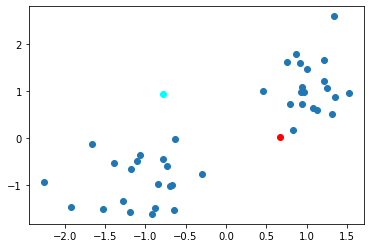

In [167]:
plt.scatter(X[:, 0],X[:, 1])
plt.plot(center[0, 0], center[0, 1], 'o', c='red')         # 令第一个点为红色
plt.plot(center[1, 0], center[1, 1], 'o', c='cyan')        # 令第二个点为蓝色

- 依据中心点，对数据进行类别划分

&emsp;&emsp;首先给出聚类算法分群结束后分得的每个群的定义，为了区分分类算法分类别这一概念，我们成聚类算法分出来的“群”为一个簇。

&emsp;&emsp;在给出两个中心点之后，我们就能够依据这两个中心点将数据分成两个簇，划分的过程也非常简单：计算每个点到两个中心点的距离，如果距离红色中心点更近，则该点属于红色点代表的簇（以下简称红色点簇），而如果该点距离蓝色中心点更近，则应该属于蓝色点代表的簇（以下简称蓝色点簇）。

&emsp;&emsp;当然，关于距离的计算其实有很多种，我们在Lesson 4.1中曾介绍了多种距离的计算方法，此处我们以欧式距离为例，来进行距离计算，相关计算过程可以由如下代码实现：

In [168]:
center

array([[ 0.66698806,  0.02581308],
       [-0.77761941,  0.94863382]])

In [169]:
# 计算每条样本距离红色中心点距离
np.power((X - center[0]), 2).sum(1)

array([2.80418598, 4.53045247, 4.13895531, 5.96788755, 5.43938343,
       3.865367  , 3.25889336, 7.13376456, 2.30412925, 8.92312473,
       3.37863704, 2.33823889, 4.64766873, 3.16445859, 5.17815242,
       1.55545174, 1.69836706, 5.6316741 , 9.43394061, 2.93573695,
       2.1952354 , 1.68759248, 0.99370862, 1.5880287 , 0.50250126,
       1.21754799, 1.4285248 , 0.052919  , 0.64128333, 2.52979672,
       0.53203112, 1.17477822, 2.55720201, 7.04514128, 1.0019926 ,
       2.98793165, 3.17855917, 0.55893052, 1.00322863, 0.55888205])

In [170]:
# 对比距离中心点远近情况
res_bool = np.power((X - center[0]), 2).sum(1) < np.power((X - center[1]), 2).sum(1)
res_bool

array([ True, False,  True,  True, False, False,  True, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [171]:
res = res_bool*1
res

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

根据代码可知，1代表该样本距离红色中心点更近，应该属于红色点簇，而0则代表该样本距离蓝色中心点更近，应该属于蓝色点簇。我们可以通过可视化的方式进行呈现，令红色点簇中的点都着上红色，令蓝色点簇中的点都着上蓝色：

In [172]:
# 选取红色点簇
X_red = X[(res_bool)]
X_red

array([[-0.66650597, -0.98709346],
       [-0.6491641 , -1.52554078],
       [-1.18377406, -1.56872985],
       [-0.83886424, -0.96982853],
       [-0.73091902, -0.59394067],
       [-0.87944685, -1.47625477],
       [-0.91318318, -1.61162739],
       [-0.29234001, -0.77114451],
       [-0.69690225, -1.01126945],
       [ 1.00671113,  1.46797245],
       [ 1.21031133,  1.20580982],
       [ 0.96433804,  0.97728121],
       [ 1.52044299,  0.95298263],
       [ 0.78957802,  0.72400572],
       [ 0.93945123,  1.09507068],
       [ 1.2560687 ,  1.06576923],
       [ 0.83419144,  0.18380686],
       [ 1.30955704,  0.50371311],
       [ 0.91932681,  1.59620217],
       [ 1.12536828,  0.59319188],
       [ 1.35181182,  0.86592893],
       [ 0.75872026,  1.62230524],
       [ 1.33843006,  2.59375134],
       [ 0.45971762,  1.00511465],
       [ 1.21891484,  1.66389381],
       [ 0.87442748,  1.79655531],
       [ 1.08540885,  0.64537305],
       [ 0.9334877 ,  0.99132153],
       [ 0.94945354,

In [173]:
# 选取蓝色点簇
X_blue = X[(~res_bool)]
X_blue

array([[-1.38880971, -0.52568309],
       [-1.66107376, -0.11387086],
       [-1.1737295 , -0.66492992],
       [-1.521725  , -1.50497094],
       [-0.77913181, -0.43556157],
       [-1.91903388, -1.46938432],
       [-1.10092026, -0.47731436],
       [-1.06813338, -0.3663759 ],
       [-0.63556208, -0.01578263],
       [-1.273894  , -1.33970914],
       [-2.25311516, -0.92651975]])

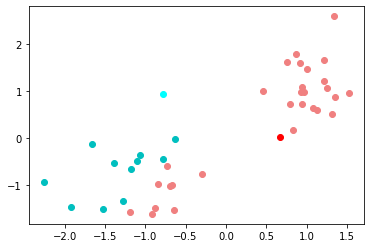

In [174]:
plt.plot(X_red[:, 0],X_red[:, 1], 'o', c='lightcoral')
plt.plot(center[0, 0], center[0, 1], 'o', c='red')
plt.plot(X_blue[:, 0],X_blue[:, 1], 'o', c='c')
plt.plot(center[1, 0], center[1, 1], 'o', c='cyan')

&emsp;&emsp;至此，我们就根据两个中心点，对上述数据集进行了两个簇的划分。由此我们也可得知，只要给出一组中心点，就能够对数据集进行一次分群。

- 重新计算中心点

&emsp;&emsp;尽管上述过程确实将所有的点分成了两个簇，但划分结果却并不理想。对于K-Means来说，其聚类的核心目的是将类似的划分成一类，而上面的划分结果很明显无法满足要求。比如对于左下方的一些点来说，明明彼此距离更近，却有些点和右上方的点属于同一类，这并不符合挨得越近越有可能属于同一类的初衷。因此我们还需要进行进一步的计算，也就是换中心点，再进行簇的划分。

&emsp;&emsp;而新的中心点应该如何计算？对于K-Means来说，我们会根据上述划分结果，通过计算不同簇的质心来重新计算中心点。此时我们将红色点簇的中心点改为红色点簇的质心，而蓝色点簇的中心点改为蓝色点簇的质心。注意，在上述表述中，中心点表示K-Means的建模含义，即据此划分数据集，而质心其实表示的中心点的计算方法。对于利用欧式距离进行计算的K-Means快速聚类来说，质心是采用均值来进行计算的：

$$
x_{cen} = \frac{x_1+x_2+...+x_n}{n}
$$

$$
y_{cen} = \frac{y_1+y_2+...+y_n}{n}
$$

> 为什么说利用欧式距离进行K-Means的聚类算法才是用均值计算质心，稍后在解释K-Means的数学原理时会详细探讨。

&emsp;&emsp;而对于上述点簇，我们可以通过如下方法计算各簇的质心：

In [175]:
X_red.mean(0)

array([0.48257302, 0.40526208])

In [176]:
X_blue.mean(0)

array([-1.3431935 , -0.71273659])

而这两个点，就构成了新的中心点，其中第一个点就是红色点簇新的中心点、第二个点就是蓝色点簇新的中心点。接下来围绕这两个点再来进行下一轮划分：

In [177]:
center = np.array([X_red.mean(0), X_blue.mean(0)])
center

array([[ 0.48257302,  0.40526208],
       [-1.3431935 , -0.71273659]])

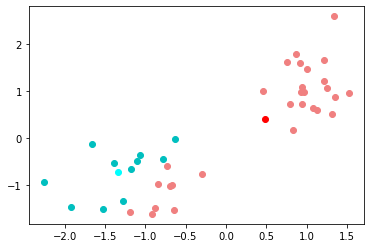

In [178]:
plt.plot(X_red[:, 0],X_red[:, 1], 'o', c='lightcoral')
plt.plot(center[0, 0], center[0, 1], 'o', c='red')
plt.plot(X_blue[:, 0],X_blue[:, 1], 'o', c='c')
plt.plot(center[1, 0], center[1, 1], 'o', c='cyan')

- 第二次迭代

&emsp;&emsp;接下来，重复上述依据中心点划分数据集的方法，根据新的中心点对数据集进行再一次的划分：

In [179]:
# 距离计算结果
res_bool = np.power((X - center[0]), 2).sum(1) < np.power((X - center[1]), 2).sum(1)
res = res_bool*1

In [180]:
# 新的簇的划分
X_red = X[(res_bool)]
X_blue = X[(~res_bool)]

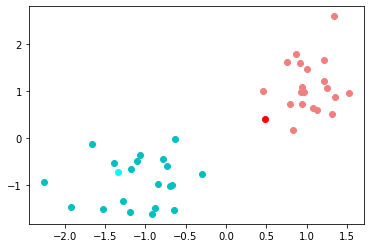

In [181]:
# 展示划分结果
plt.plot(X_red[:, 0],X_red[:, 1], 'o', c='lightcoral')
plt.plot(center[0, 0], center[0, 1], 'o', c='red')
plt.plot(X_blue[:, 0],X_blue[:, 1], 'o', c='c')
plt.plot(center[1, 0], center[1, 1], 'o', c='cyan')

&emsp;&emsp;在本轮计算结束后，我们发现聚类的结果已经更贴近于K-Means所要求的距离更近更有可能属于同一个簇的目标。当然，前面所有的计算我们可以将其视为两轮运算，每一轮计算中都包含以下三步：      
&emsp;&emsp;（1）确定中心点，第一轮是随机生成的，其他情况都是通过质心计算得到；      
&emsp;&emsp;（2）根据中心点，计算每个点到中心点的距离；      
&emsp;&emsp;（3）根据距离计算结果，对数据集进行划分。        
并且后一轮的中心点的位置，实际上是由前一轮计算结果（也就是数据集的划分结果）决定的，也就是当前计算条件其实是上一轮的计算结果（所决定），因此上述过程本质上也是在迭代，即整个K-Means的计算过程实际上是迭代计算过程。

- K-Means迭代停止条件

&emsp;&emsp;那何时迭代停止呢？一般来说有两个等价的条件：      
&emsp;&emsp;（1）相邻两次迭代过程中质心位置不发生变化；      
&emsp;&emsp;（2）相邻两次迭代过程中各点所属类别不发生变化；      
&emsp;&emsp;注意，这两个条件是等价的，如果质心位置不变，则数据集划分情况就不会发生变化，而如果数据集划分情况不发生变化，则质心也就不变。当然，迭代停止也就等价于模型收敛了，因此对于K-Means来说，和梯度下降求解参数一样，都存在模型收敛这一说法。

&emsp;&emsp;接下来，我们就尝试继续进行计算，看下数据集划分情况或者中心点是否发生变化。首先继续计算心的质心：

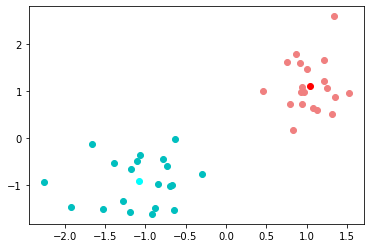

In [182]:
center = np.array([X_red.mean(0), X_blue.mean(0)])
plt.plot(X_red[:, 0],X_red[:, 1], 'o', c='lightcoral')
plt.plot(center[0, 0], center[0, 1], 'o', c='red')
plt.plot(X_blue[:, 0],X_blue[:, 1], 'o', c='c')
plt.plot(center[1, 0], center[1, 1], 'o', c='cyan')

然后进行数据集的重新划分：

In [183]:
# 距离计算结果
res_bool = np.power((X - center[0]), 2).sum(1) < np.power((X - center[1]), 2).sum(1)
res = res_bool*1

In [184]:
# 新的簇的划分
X_red = X[(res_bool)]
X_blue = X[(~res_bool)]

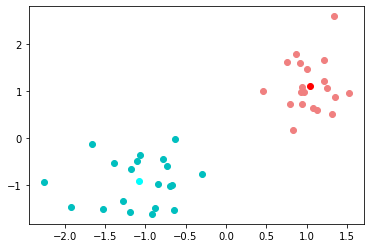

In [185]:
# 展示划分结果
plt.plot(X_red[:, 0],X_red[:, 1], 'o', c='lightcoral')
plt.plot(center[0, 0], center[0, 1], 'o', c='red')
plt.plot(X_blue[:, 0],X_blue[:, 1], 'o', c='c')
plt.plot(center[1, 0], center[1, 1], 'o', c='cyan')

我们发现数据集划分方式并为发生变化，说明已经达到K-Means模型收敛条件，模型将不再进行迭代，而上述过程就是一整个K-Means快速聚类的过程。当然，如果将上述代码封装为一个完整函数，该函数就是K-Means快速聚类的手动实现方法。

### 2.K-Means快速聚类的背后的数学意义

&emsp;&emsp;不难看出，相比很多有监督学习算法，K-Means的计算过程相对简单，并且稍后在进行sklearn的实现过程中，我们也会发现K-Means评估器的参数也不算多。不过尽管如此，我们还是需要稍微深入点儿来讨论K-Means快速聚类过程背后的数学意义，在这个过程中，我们会发现K-Means作为一个无监督学习算法，其背后有非常多的原理都和我们此前介绍的一系列算法的原理是相通的。

- K-Means建模目标的数学等价表示

&emsp;&emsp;尽管我们此前一直说，K-Means快速聚类的目标是让更接近的点划分为同一个簇，以达到“物以类聚、人以群分”的效果，但实际上这一目标背后其实有更加严谨的数学表示，那就是在给定K（簇的个数）的情况下，找到一种最优的划分情况，使得组内误差平方和尽可能的小。这里所谓的组内误差平方和，指的是每个点到当前簇的中心点的距离的平方和，我们可以通过如下数学计算符号来进行表示：

|Name|Description|      
|:--:|:--:|      
|$x$|单独样本|      
|$C_i$|第i个簇|
|$c_i$|簇$C_i$的质心|	
|$c$|所有点的质心|	
|$m_i$|第i个簇中数据个数|	
|$m$|数据集总个数|	
|$K$|簇的个数|	

则组内误差为：

$$
\sum^K_{i=1}\sum_{x\in C_i}(c_i-x)^2
$$

这点其实不难理解，如果每个点都距离各自中心点更近，肯定聚类效果会更好。而由此，则可进一步衍生出原型和质心计算公式的数学意义这两个至关重要的点。

- 原型与SSE

&emsp;&emsp;在K-Means快速聚类中，中心点、质心其实还有另一个叫法：原型。即当前簇中所有点的原型。换而言之，很多时候我们在进行聚类分析时，最后实际上是要利用这个中心点、质心或者原型来代表一个簇的数据的，例如此前介绍的RFM客户价值划分模型中，如果我们将客户划分成高、中、低价值三类，最终我们还是需要从这三类中找到具有代表性的“典型”，才能为后续的诸如产品设计环节提供数据支持。也就是说，我们其实是希望通过原型来“代表”一个簇中的点，也就是说，我们希望通过原型来预测这个簇中数据的表现。

&emsp;&emsp;那既然是预测，就肯定会有误差，而这里用原型预测一个簇中其他所有点的误差，就是上述的组内平方和误差，也就是簇内所有点到这个原型之间距离的平方和。而在线性回归中我们曾介绍，预测值和真实值之间的距离，被称为SSE，因此对于K-Means快速聚类来说，其组内误差平方和也就是SSE：

$$
SSE = \sum^K_{i=1}\sum_{x\in C_i}(c_i-x)^2
$$

- 质心的最佳计算公式

&emsp;&emsp;当然，上述SSE其实就是对当前聚类状况的一个评估，SSE越大，则说明当前聚类效果较差，而SSE较小，则说明当前聚类效果较好。回顾上述聚类过程，能够明显看到SSE下降趋势：

In [198]:
# 第一轮SSE
# 确定中心点
np.random.seed(23)
center = np.random.randn(2, 2)

# 计算距离
res_bool = np.power((X - center[0]), 2).sum(1) < np.power((X - center[1]), 2).sum(1)
res = res_bool*1

# 划分数据集
X_red = X[(res_bool)]
X_blue = X[(~res_bool)]

# 计算SSE
np.power((X_red - center[0]), 2).sum()

66.26098649489376

In [199]:
# 第二轮SSE
# 确定中心点
center = np.array([X_red.mean(0), X_blue.mean(0)])

# 计算距离
res_bool = np.power((X - center[0]), 2).sum(1) < np.power((X - center[1]), 2).sum(1)
res = res_bool*1

# 划分数据集
X_red = X[(res_bool)]
X_blue = X[(~res_bool)]

# 计算SSE
np.power((X_red - center[0]), 2).sum()

23.256673490142994

&emsp;&emsp;而更进一步，可以借助数学证明，选取质心作为中心点，实际上是有利于让SSE下降速度最快的迭代方法。在梯度下降中我们曾提到，令损失函数导函数取值为0的方向，就是损失函数值下降最快的方向，此处也类似，由于原型概念的引入，使得我们可以将K-Means视作预测模型，而上述SSE就是其损失函数，并且该损失函数中变量为$c_k$，也就是质心，对其求导可得：

$$\begin{align}
\frac{\partial}{\partial c_k}SSE 
&= \sum^K_{i=1}\sum_{x\in C_i}\frac{\partial}{\partial c_i}(c_i-x)^2 \\
&=\sum^K_{i=1}\sum_{x\in C_i}2(c_i-x) = 0
\end{align}$$

因此，对于给定的i，上式的必要条件是：

$$\sum_{x\in C_i}(c_i-x) = 0$$

由该式可以进一步推导得出：

$$
\sum_{x \in C_i}x = m_ic_i
$$

即$$c_i = \frac{1}{m_i}\sum_{x \in C_i}x$$

即中心是由质心计算得出。换而言之，中心点采用每个点各维度均值的计算方式，能够让SSE下降速度最快。当然如果样本距离的计算方式发生变化，则质心对应的计算方式也必须发生变化，例如，如果采用曼哈顿距离进行距离计算，则需要采用中位数作为质心的计算方法。

## 三、K-Means快速聚类的sklearn实现方法

&emsp;&emsp;接下来，我们尝试在sklearn中进行K-Means快速聚类，并尝补充讲解K-Means聚类算法在使用过程中的注意事项，同时补充介绍关于Mini Batch K-Means的相关内容  。     

### 1.sklearn中实现K-Means快速快速聚类

&emsp;&emsp;首先，作为聚类的评估器，K-Means在sklearn.cluster模块下，通过如下方式进行导入，并查看K-Means的超参数。

In [2]:
from sklearn.cluster import KMeans

In [188]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='deprecated',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs='deprecated',
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passe

除了通用的verbose、random_state和copy_x外，我们重点介绍其他各参数：

|Name|Description|      
|:--:|:--:|      
|n_clusters|聚类类别总数|      
|init|初始中心点创建方法|
|n_init|初始化几次中心点|
|max_iter|最大迭代次数|	
|tol|收敛条件|	
|precompute_distances|是否提前预计算距离|	
|algorithm|优化距离计算的方法选取|	

&emsp;&emsp;围绕上述参数，需要重点解释的是关于K-Means迭代不平稳的问题。

&emsp;&emsp;尽管此前例子中K-Means的迭代过程快速高效，但实际上，当面对复杂数据集时，K-Measn很有可能陷入“局部最小值陷进”或者“震荡收敛”。所谓落入局部最小值陷进，指的是尽管可能有更好的划分数据集的方法（SSE取值更小），但根据K-Means的收敛条件却无法达到，算法会在另外一种划分情况时停止迭代；而所谓“震荡收敛”，指的是算法会在两种不同的划分方法中来回震荡（尽管SSE取值可能有差别）。前种情况非常类似于参数进行梯度下降求解过程中，如果采用BGD，并且参数在一个局部最小值点附近，则最终参数会收敛到局部最小值点类似，而后面一种情况则非常类似于学习率过大导致无法收敛、一直处于震荡状态。

&emsp;&emsp;而出现这种问题的根本原因，其实在于初始中心点的随机选取。因此sklearn中其实集成了两种技术手段来避免上述两种问题的出现。其一是采用k-means++算法来计算初始中心点，经过这种算法生成的中心点，能够大概率在后续的迭代过程中让模型保持平稳，相关说明可参考论文：[“k-means++: The advantages of careful seeding” ](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)。而无论k-means++是否生效，为了保险起见，sklearn中都采用了多次初始化中心点、多次训练模型、然后找到最优数据集划分的方法，这就是n_init参数的意义。在这双重保证下，sklearn的K-means快速聚类能够整体保持非常平稳的状态。

&emsp;&emsp;接下来，尝试调用sklearn中快速聚类方法对数据集进行聚类：

In [291]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

注意，对于无监督学习算法，只需要带入特征矩阵进行计算即可。在训练完成后，我们即可调用评估器的相关属性来查看聚类结果：

In [292]:
# 查看中心点
km.cluster_centers_

array([[-1.08131141, -0.91777659],
       [ 1.04228586,  1.11340149]])

In [293]:
# 查看每条数据属于哪一类
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

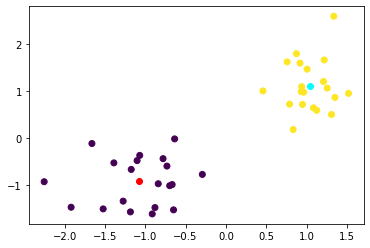

In [294]:
# 借助图像进行验证
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.plot(km.cluster_centers_[0, 0], km.cluster_centers_[0, 1], 'o', c='red')
plt.plot(km.cluster_centers_[1, 0], km.cluster_centers_[1, 1], 'o', c='cyan')

In [295]:
# 收敛时SSE
km.inertia_

16.352095518854334

> 注意，此处和手动实现过程SSE计算结果不同，原因是手动实现时SSE是上一轮迭代完的中心点，若在手动实现部分将中心点改为两次迭代后的质心，则计算结果相同。

In [296]:
# 迭代次数
km.n_iter_

3

&emsp;&emsp;能够发现，和此前手动实现结果一致。此外，K-Means评估器也支持predict方法，对于新的数据，K-Means模型能够依据其距离各中心点的远近来对其类别所属情况进行判别：

In [297]:
X_new = np.random.randn(2, 2)

In [298]:
km.predict(X_new)

array([0, 0], dtype=int32)

&emsp;&emsp;当然，正因如此，我们可以绘制K-Means的决策边界，类似于有监督学习算法，决策边界的形状其实一定程度将决定聚类算法针对不同分布的数据集时聚类的“性能”。

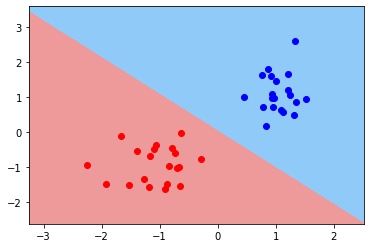

In [299]:
plot_decision_boundary(X, km.labels_, km)

### 2.轮廓系数基本概念与sklearn中实现方法

- 轮廓系数基本概念

&emsp;&emsp;尽管我们可以通过SSE来表示当前K-Means聚类模型效果好坏（甚至作为损失函数），但SSE却不能作为模型超参数（K）的选取依据。其实我们不难发现，伴随K增加，模型整体SSE将会逐渐下降。不过，尽管如此，其实K-Means快速聚类中，还是有部分指标可以一定程度上给出聚成几类的指导意见，其中最有名的就是轮廓系数（silhouette coefficient，简称sc）。注意，对于K-Means来说，这些指标只能参考，最终聚成几类，还应该主要参考模型的业务背景。

&emsp;&emsp;轮廓系数的计算过程如下：         
&emsp;&emsp;(1).对于第i条数据（以下简称i），计算该对象到所属簇的平均距离，记为$a_i$；        
&emsp;&emsp;(2).如果还存在其他簇（不包含第i个对象的簇，如A、B两个簇），分不同的簇，计算该对象到这些簇的所有点的平均距离（例如计算i到A簇中所有点的平均距离，以及计算i到B簇中所有点的平均距离），并在这些距离中找到最小值记为$b_i$；        
&emsp;&emsp;(3).则对于i，轮廓系数计算结果为：$s_i=\frac{b_i-a_i}{max(a_i, b_i)}$；        
&emsp;&emsp;(4).而对于聚类中的所有N条数据，最终轮廓系数为单个$s_i$的均值，即$s=mean(s_i)$

&emsp;&emsp;尽管轮廓系数可以在[-1, 1]区间内取值，但我们并不希望轮廓系数出现负值，此时代表组内的平均距离要大于组外平均距离的最小值，此时说明聚类算法无效。我们希望$b_i>a_i$，并且希望$a_i$尽可能的小，此时$s_i$也就趋近于1，而当轮廓系数趋于0时，则说明各簇重叠现象明显。并且，非常重要的一点是，轮廓系数取值的大小一定程度上能够给K的取值提供建议，当轮廓系数比较大时，往往说明数据在特征空间中本身的分布情况就和聚类的类别数量相同。

> 和SSE不同，轮廓系数受到K的影响相对较小，这也是轮廓系数相对可靠的原因之一。

- 轮廓系数的sklearn中实现方法

&emsp;&emsp;当然，我们也可以借助sklearn中metrics模块下的silhouette_score函数来进行轮廓系数的计算：

In [250]:
from sklearn.metrics import silhouette_score

In [251]:
silhouette_score(X, km.labels_)

0.7241755028408805

&emsp;&emsp;而更进一步的，轮廓系数如何指导K值的选取，我们可以通过如下实例来进行说明。此处手动生成一组三分类明显的数据集，观察K取值不同时轮廓系数的变化情况。

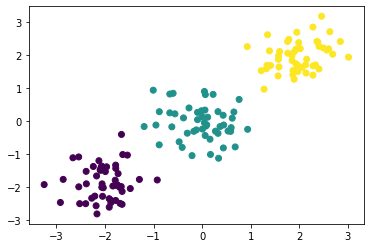

In [283]:
np.random.seed(23)
X, y = arrayGenCla(num_examples = 50, num_inputs = 2, num_class = 3, deg_dispersion = [2, 0.5])
plt.scatter(X[:, 0], X[:, 1], c=y)

In [284]:
ss = []

for i in range(2, 12):
    km = KMeans(n_clusters=i).fit(X)
    ss.append(silhouette_score(X, km.labels_))

In [285]:
ss

[0.5917969390803755,
 0.6753180189915984,
 0.580872808406484,
 0.47687683047050644,
 0.3685113521594094,
 0.3653820829962011,
 0.3639995054273048,
 0.3524637605205039,
 0.3579462241667135,
 0.3682450219445942]

&emsp;&emsp;能够发现，当K取值为3时轮廓系数取值最高，也就是说明从特征空间的数据分布来看，整体呈现聚成三类的趋势。当然，这个我们创建数据集时赋予的规律一致。

> 不过，仍然需要强调的是，除非特征矩阵在特征空间的“分界”非常明显，才能在轮廓系数上有明显差异。而聚类算法在分类上的性能，其实也远远弱于有监督学习算法。